In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.cluster import KMeans 
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from pathlib import Path

In [3]:
import sys

sys.path.append('../src')



In [4]:
from base_exp_gen import generate_experiment as GEN_EXP
from clustering_algos import agglomerative_clustering, kmeans_clustering, box_clustering
from sklearn.model_selection import train_test_split as datasplit
from sklearn.ensemble import GradientBoostingRegressor as GDBR
from evaluations import computeATT_per_cluster as ATTC, predict_cf, calculate_ite, get_homogeneity, generate_paths



In [5]:
np.random.seed(seed = 0)

In [6]:
fonts = {'family': 'cmr10','weight': 'normal',
            'size': 20}    
div = 1

l1 = 22/div
l2 = 20/div
l3 = 13/(div-0.2)

mpl.rcParams['xtick.labelsize'] = l2
mpl.rcParams['ytick.labelsize'] = l2
mpl.rcParams['axes.labelsize'] = l1
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = l3

#axes_font = {'labelsize':l1}
#mpl.rc('font', **font)
#xticks = {'labelsize':l2}# 'ytick.labelsize':20}
#yticks = {'labelsize':l2}# 'ytick.labelsize':20}
#legend = {'fontsize':l3}
# tex = {'usetex':True}
#mpl.rc('axes', **axes_font)
#mpl.rc('xtick', **xticks)
#mpl.rc('ytick', **yticks)
#mpl.rc('font', **fonts)
#mpl.rc('legend', **legend)

In [7]:
print(mpl.rcParams['xtick.labelsize'])

20.0


In [8]:
pd.set_option("display.max_columns", None)


### Generate Experiment

In [9]:
%%time
path_figs = './figs/2Mstd5/With_EFF_CALC'
Path(path_figs).mkdir(exist_ok = True, parents = True)
N,D = 2*10**6, 2
x = int((N)**(1/4))
clusters = x**2
print("Number of Clusters:{}, Number of Points:{}".format(clusters, N))
kw_generate =  {'N':N, 'D':D,'f_gen_name': 'uniform_gen','low':0, 'high': 1}
kw_cluster =  {'f_class_name':'circle_class', 'centers': [0.5, 0.5], 'r_small': 0.2, 'r_big':0.4}
kw_treatment = {'f_treat_name' :'uniform_treat','choices':[0,1], 'probabilities':[0.5,0.5]}

std = 5
stats = np.array([[1, std], [0, std], [1, std], [1, std]])
kw_outcome = {'f_outcome_name': 'outcome1','treatment':'Treatment', 'cls':'C', 'stats':stats}

data = GEN_EXP(kw_generate, kw_cluster, kw_treatment, kw_outcome).dat
data = calculate_ite(data.copy(), treatment = 'Treatment',
                     counterfactual = 'Ycf', outcome = 'Y', ite_name = 'ITE')

Number of Clusters:1369, Number of Points:2000000
CPU times: user 1.15 s, sys: 483 ms, total: 1.63 s
Wall time: 1.6 s


In [10]:
data

,x0,x1,C,Treatment,Y,Ycf,ITE
0,0.548814,0.715189,1,0,9.965060,1.816760,-8.148300
1,0.602763,0.544883,0,0,9.189899,0.518928,-8.670971
2,0.423655,0.645894,0,0,3.758011,-0.579457,-4.337468
3,0.437587,0.891773,1,1,1.389764,-1.482725,2.872489
4,0.963663,0.383442,0,0,-10.479152,6.160328,16.639480
...,...,...,...,...,...,...,...
1999995,0.076927,0.271817,0,0,4.558481,-3.107663,-7.666144
1999996,0.826662,0.335635,1,0,2.382933,-2.334834,-4.717767
1999997,0.930859,0.999898,0,0,-2.999037,8.870539,11.869577
1999998,0.794392,0.928825,0,1,-3.380580,-3.962592,0.582012


In [11]:
data.describe()

,x0,x1,C,Treatment,Y,Ycf,ITE
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,4.997836e-01,5.001988e-01,3.774610e-01,5.001005e-01,8.142636e-01,8.151898e-01,3.786323e-01
std,2.887267e-01,2.886267e-01,4.847518e-01,5.000001e-01,5.012017e+00,5.016939e+00,7.086182e+00
min,1.637144e-07,2.516784e-08,0.000000e+00,0.000000e+00,-2.659529e+01,-2.374868e+01,-3.689058e+01
25%,2.495544e-01,2.502948e-01,0.000000e+00,0.000000e+00,-2.565503e+00,-2.567915e+00,-4.405667e+00
50%,4.999703e-01,5.003810e-01,0.000000e+00,1.000000e+00,8.163050e-01,8.171418e-01,3.796200e-01
75%,7.499998e-01,7.500191e-01,1.000000e+00,1.000000e+00,4.196194e+00,4.201078e+00,5.159550e+00
max,9.999993e-01,9.999997e-01,1.000000e+00,1.000000e+00,2.433922e+01,2.545277e+01,3.647708e+01


In [12]:
#mpl.style.use(['seaborn-paper'])
#mpl.rcParams.update(mpl.rcParamsDefault)


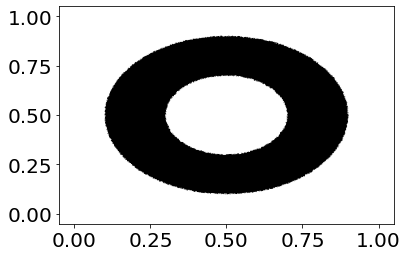

In [13]:
fig, ax = plt.subplots()

ax.scatter(data['x0'].values, data['x1'].values, c=data['C'].values, cmap = 'Greys', s=0.1)

fig.savefig(path_figs+'data.jpeg',bbox_inches='tight', pad_inches = 0)

plt.show()

In [14]:
from econml.metalearners import XLearner as XL
from sklearn.ensemble import RandomForestClassifier as RF

/home/mavrog2/.conda/envs/jorje/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [15]:
%%time
f1_kwargs = {'n_estimators':400, 'max_depth':18}
f2_kwargs = {'n_estimators':400, 'max_depth':18}

m0 = GDBR(**f1_kwargs)
m1 = GDBR(**f1_kwargs)
t0 = GDBR(**f1_kwargs)
t1 = GDBR(**f1_kwargs)
g = RF(n_estimators = 400)

model = XL((m0,m1), (t0,t1), categories=[0,1])
xml = model.fit(data.Y, data.Treatment, X = data[['x0','x1']])

CPU times: user 2h 56min 39s, sys: 4.68 s, total: 2h 56min 43s
Wall time: 2h 56min 2s


In [16]:
itexml = xml.effect(data[['x0','x1']])

In [48]:
itexml.min(), itexml.max()

(-15.579309516999306, 12.926247485912064)

In [49]:
filt = itexml >=0.5
itexml2 = itexml.copy()
itexml2[filt] = 1
itexml2[~filt] = 0

In [75]:
data['ITE-XML'] = itexml

(-2, 2)

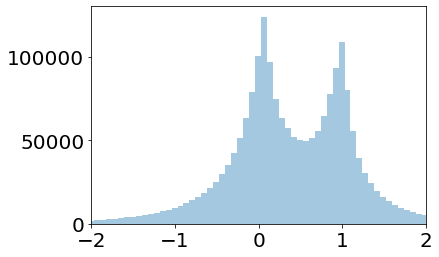

In [70]:
fig, ax = plt.subplots()

ax = sns.distplot(itexml,  bins=400, kde = False,ax = ax)
ax.set_xlim(-2,2)

In [78]:
xlearn,_ = kmeans_clustering(data, clusters = 2, cluster_name = 'ITE-XML2',col_select = ['ITE-XML'] )

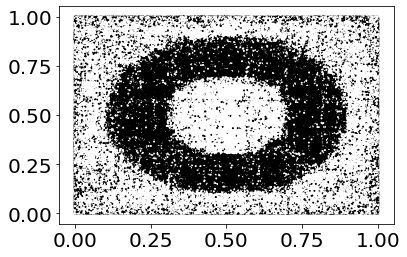

In [51]:
fig, ax = plt.subplots()

sc = ax.scatter(data['x0'].values, data['x1'].values, c=itexml2, cmap = 'Greys', s = 1)


In [88]:
data2.columns

Index(['x0', 'x1', 'C', 'Treatment', 'Y', 'Ycf', 'ITE', 'IS_TEST', 'Ycf-GDBR',
       'ITE-GDBR', 'Box-Cluster', 'Kmeans-Cluster', 'ITE-CTrue', 'ITE-CGDBR',
       'C2-Avg', 'Box-Cl2', 'Kmeans-Cl2', 'Box2-Cl2', 'Kmeans2-Cl2',
       'Box-Cl2y', 'Kmeans-Cl2y', 'Box2-Cl2y', 'Kmeans2-Cl2y', 'ITE-CTruey',
       'ITE-CGDBRy'],
      dtype='object')

In [90]:
data2['ITE-GDBR']

0          -9.478727
1          -7.798244
2          -2.747378
3           1.055796
4          11.772584
             ...    
1999995    -2.857015
1999996    -1.796699
1999997     8.768127
1999998    -3.730936
1999999     4.411380
Name: ITE-GDBR, Length: 2000000, dtype: float64

In [93]:
filt = data2['Box2-Cl2'] == 1
elg = data2.loc[filt, 'ITE-GDBR'].mean()
nelg = data2.loc[~filt, 'ITE-GDBR'].mean()

data2['Fel'] = 0
data2.loc[filt,'Fel'] = elg
data2.loc[~filt,'Fel'] = nelg

In [104]:
filt = xlearn['ITE-XML2'] == 1
elg = xlearn.loc[filt, 'ITE-XML'].mean()
nelg = xlearn.loc[~filt, 'ITE-XML'].mean()

xlearn['Fel'] = 0
xlearn.loc[filt,'Fel'] = elg
xlearn.loc[~filt,'Fel'] = nelg

In [105]:
err1 = np.mean(np.abs(data2['C'].values-data2['Fel'].values))
err2 = np.mean(np.abs(xlearn['C'].values-xlearn['Fel'].values))


In [106]:
err1, err2, err2/err1

(0.06841992578846086, 0.3043049590726707, 4.447607265952227)

In [102]:
xlearn.head()

,x0,x1,C,Treatment,Y,Ycf,ITE,IS_TEST,Ycf-GDBR,ITE-GDBR,Box-Cluster,Kmeans-Cluster,ITE-XML,ITE-XML2,Fel
0,0.548814,0.715189,1,0,9.965060,1.816760,-8.148300,1,0.486333,-9.478727,982,1282,0.694707,1,2.052905
1,0.602763,0.544883,0,0,9.189899,0.518928,-8.670971,0,1.391655,-7.798244,762,970,-0.074314,0,-1.149013
2,0.423655,0.645894,0,0,3.758011,-0.579457,-4.337468,1,1.010634,-2.747378,866,986,0.090736,0,-1.149013
3,0.437587,0.891773,1,1,1.389764,-1.482725,2.872489,0,0.333968,1.055796,1200,218,0.490841,1,2.052905
4,0.963663,0.383442,0,0,-10.479152,6.160328,16.639480,0,1.293432,11.772584,553,805,0.741494,1,2.052905


In [96]:
data2.head()

,x0,x1,C,Treatment,Y,Ycf,ITE,IS_TEST,Ycf-GDBR,ITE-GDBR,Box-Cluster,Kmeans-Cluster,ITE-CTrue,ITE-CGDBR,C2-Avg,Box-Cl2,Kmeans-Cl2,Box2-Cl2,Kmeans2-Cl2,Box-Cl2y,Kmeans-Cl2y,Box2-Cl2y,Kmeans2-Cl2y,ITE-CTruey,ITE-CGDBRy,Fel
0,0.548814,0.715189,1,0,9.965060,1.816760,-8.148300,1,0.486333,-9.478727,982,1282,0,0,7154,1,1,1,1,1.000000,1.0,1.000000,1.0,0.516432,0.521127,0.958015
1,0.602763,0.544883,0,0,9.189899,0.518928,-8.670971,0,1.391655,-7.798244,762,970,0,0,5460,0,0,0,0,0.000000,0.0,0.000000,0.0,0.473404,0.505319,0.032211
2,0.423655,0.645894,0,0,3.758011,-0.579457,-4.337468,1,1.010634,-2.747378,866,986,0,0,6442,0,0,0,0,0.000000,0.0,0.000000,0.0,0.471795,0.492308,0.032211
3,0.437587,0.891773,1,1,1.389764,-1.482725,2.872489,0,0.333968,1.055796,1200,218,1,1,8943,1,0,1,0,0.845361,0.0,0.221649,0.0,0.551546,0.546392,0.958015
4,0.963663,0.383442,0,0,-10.479152,6.160328,16.639480,0,1.293432,11.772584,553,805,1,1,3896,0,0,0,0,0.000000,0.0,0.000000,0.0,0.456221,0.483871,0.032211


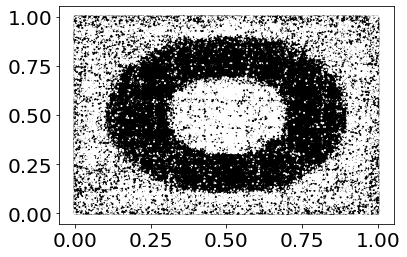

In [80]:
fig, ax = plt.subplots()

sc = ax.scatter(xlearn['x0'].values, xlearn['x1'].values, c=xlearn['ITE-XML2'].values, cmap = 'Greys', s = 1)


In [18]:
%%time
f1_kwargs = {'n_estimators':400, 'max_depth':18}
f2_kwargs = {'n_estimators':400, 'max_depth':18}

data, models = predict_cf(data.copy(), col_select = ['x0', 'x1'], f1 = GDBR,
                          f2 = GDBR, cf_name = 'Ycf-GDBR', f1_kwargs=f1_kwargs, 
                          f2_kwargs=f2_kwargs, ite_name ='ITE-GDBR')

CPU times: user 1h 5min 45s, sys: 2.35 s, total: 1h 5min 48s
Wall time: 1h 5min 47s


In [19]:
data.head(5)

,x0,x1,C,Treatment,Y,Ycf,ITE,IS_TEST,Ycf-GDBR,ITE-GDBR
0,0.548814,0.715189,1,0,9.965060,1.816760,-8.148300,1,0.486333,-9.478727
1,0.602763,0.544883,0,0,9.189899,0.518928,-8.670971,0,1.391655,-7.798244
2,0.423655,0.645894,0,0,3.758011,-0.579457,-4.337468,1,1.010634,-2.747378
3,0.437587,0.891773,1,1,1.389764,-1.482725,2.872489,0,0.333968,1.055796
4,0.963663,0.383442,0,0,-10.479152,6.160328,16.639480,0,1.293432,11.772584


### Model performance

In [20]:
filt = (data['Treatment'] == 1) & (data['C'] == 1) & (data['IS_TEST'] ==0)
data.groupby(['Treatment', 'C'])[['Y', 'Ycf', 'Ycf-GDBR','ITE', 'ITE-GDBR']].mean()

Y       Ycf  Ycf-GDBR       ITE  ITE-GDBR
Treatment C                                                  
0         0  1.001391  1.001315  1.002070 -0.000076  0.000679
          1 -0.000802  1.005553  1.001951  1.006354  1.002753
1         0  1.005460  1.002306  0.962993  0.003155  0.042468
          1  1.004695  0.009913  0.064249  0.994782  0.940446

### Apply clustering 

In [21]:
%%time
col_select = ['x0', 'x1']
data,_ = box_clustering(data.copy(), clusters = clusters, col_select = col_select )
data,_ = kmeans_clustering(data.copy(), clusters = clusters, col_select = col_select )


CPU times: user 19h 26min 4s, sys: 1h 38min 3s, total: 21h 4min 7s
Wall time: 1h 43min 6s


In [22]:
data.head()

,x0,x1,C,Treatment,Y,Ycf,ITE,IS_TEST,Ycf-GDBR,ITE-GDBR,Box-Cluster,Kmeans-Cluster
0,0.548814,0.715189,1,0,9.965060,1.816760,-8.148300,1,0.486333,-9.478727,982,1282
1,0.602763,0.544883,0,0,9.189899,0.518928,-8.670971,0,1.391655,-7.798244,762,970
2,0.423655,0.645894,0,0,3.758011,-0.579457,-4.337468,1,1.010634,-2.747378,866,986
3,0.437587,0.891773,1,1,1.389764,-1.482725,2.872489,0,0.333968,1.055796,1200,218
4,0.963663,0.383442,0,0,-10.479152,6.160328,16.639480,0,1.293432,11.772584,553,805


### Calculte ATT PER Cluster  known CF

$
\begin{align}
E[Y^1|T=1,Ci ]-E[Y^0|T=1, Ci]
\end{align}
$

In [23]:
ite_name = 'ITE'
box = ATTC(data.copy(), cluster_name = 'Box-Cluster', ATT_CLUST_name='Box-ATT',
           points_name='Box-points', weight_names='Box-Weights', 
           ITE_name = ite_name, hom_name = 'Box-Hom',
          att = False)

kmeans = ATTC(data.copy(), cluster_name = 'Kmeans-Cluster', ATT_CLUST_name='Kmeans-ATT',
           points_name='Kmeans-points', weight_names='Kmeans-Weights',ITE_name = ite_name,
              hom_name = 'Kmeans-Hom', att = False)


In [24]:
box

,Box-Cluster,Box-ATT,Box-points,Box-Hom,Box-Weights
0,0,-0.079133,1409.0,1.0,0.000705
1,1,-0.172258,1451.0,1.0,0.000726
2,2,-0.196278,1399.0,1.0,0.000700
3,3,0.328019,1390.0,1.0,0.000695
4,4,-0.194898,1489.0,1.0,0.000745
...,...,...,...,...,...
1364,1364,0.426797,1486.0,1.0,0.000743
1365,1365,0.241997,1409.0,1.0,0.000705
1366,1366,0.295582,1459.0,1.0,0.000730
1367,1367,-0.200389,1447.0,1.0,0.000723


/home/mavrog2/.conda/envs/jorje/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


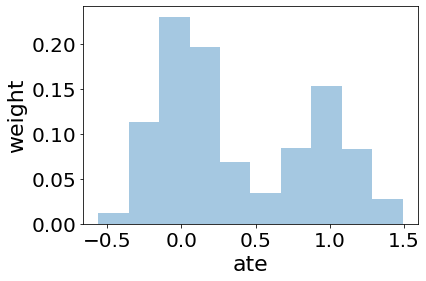

In [25]:
path2 = path_figs+'histograms/'
Path(path2).mkdir(exist_ok = True)

kde = False
bins = 10
fig, ax = plt.subplots(1,1)
ax = sns.distplot(box['Box-ATT'].values, hist_kws = {'weights':box['Box-Weights'].values} , bins=bins, kde = False,ax = ax)
ax.set_xlabel('ate')
ax.set_ylabel('weight')
fig.savefig(path2+'boxhist.pdf', bbox_inches='tight',pad_inches = 0)

plt.show()



/home/mavrog2/.conda/envs/jorje/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


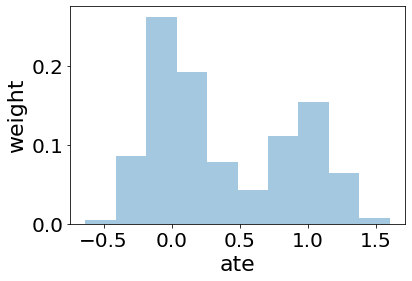

In [26]:
fig, ax = plt.subplots(1,1)
ax = sns.distplot(kmeans['Kmeans-ATT'], hist_kws={'weights':kmeans['Kmeans-Weights'].values},
                  bins = bins, kde = kde, ax = ax)

ax.set_xlabel('ate')
ax.set_ylabel('weight')
fig.savefig(path2+'Kmhist.pdf', bbox_inches='tight',pad_inches = 0)

plt.show()


/home/mavrog2/.conda/envs/jorje/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


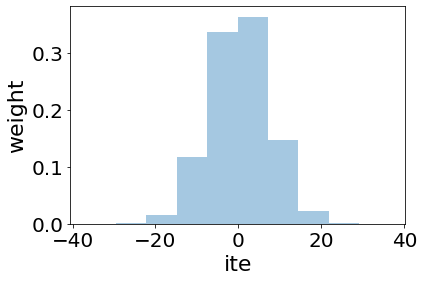

In [72]:
fig, ax = plt.subplots(1,1)
ax = sns.distplot(data['ITE'], bins = 10,hist_kws={'weights': np.ones(len(data))/len(data)},
                  kde = kde, ax = ax)
ax.set_xlabel('ite')
ax.set_ylabel('weight')
fig.savefig(path2+'itehist.pdf', bbox_inches='tight',pad_inches = 0)

plt.show()


In [28]:
box.describe()

,Box-Cluster,Box-ATT,Box-points,Box-Hom,Box-Weights
count,1369.00000,1369.000000,1369.000000,1369.000000,1369.000000
mean,684.00000,0.378275,1460.920380,0.976358,0.000730
std,395.34057,0.502365,37.097551,0.080778,0.000019
min,0.00000,-0.561265,1345.000000,0.519515,0.000673
25%,342.00000,-0.034290,1435.000000,1.000000,0.000718
50%,684.00000,0.182619,1460.000000,1.000000,0.000730
75%,1026.00000,0.892859,1486.000000,1.000000,0.000743
max,1368.00000,1.493165,1590.000000,1.000000,0.000795


### Calculate ATT per Cluster not known Model Calculated CF

In [29]:
ite_name = 'ITE-GDBR'
box2 = ATTC(data.copy(), cluster_name = 'Box-Cluster', ATT_CLUST_name='Box-ATT',
           points_name='Box-points', weight_names='Box-Weights', ITE_name = ite_name,
            hom_name = 'Box-Hom', att = False)

kmeans2 = ATTC(data.copy(), cluster_name = 'Kmeans-Cluster', ATT_CLUST_name='Kmeans-ATT',
           points_name='Kmeans-points', weight_names='Kmeans-Weights',ITE_name = ite_name,
               hom_name = 'Kmeans-Hom', att = False)



/home/mavrog2/.conda/envs/jorje/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


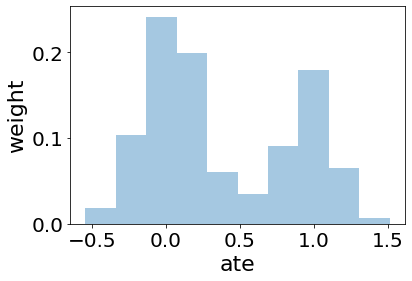

In [30]:
fig, ax = plt.subplots(1,1)
ax = sns.distplot(box2['Box-ATT'], hist_kws={'weights':box2['Box-Weights'].values},bins = bins, kde = kde,ax = ax )
ax.set_xlabel('ate')
ax.set_ylabel('weight')
fig.savefig(path2+'Box2hist.pdf', bbox_inches='tight',pad_inches = 0)

plt.show()




/home/mavrog2/.conda/envs/jorje/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


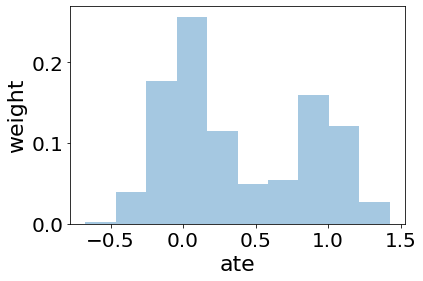

In [31]:
fig, ax = plt.subplots(1,1)
ax = sns.distplot(kmeans2['Kmeans-ATT'], hist_kws={'weights':kmeans2['Kmeans-Weights'].values},
             bins = bins, kde = kde, ax = ax)
ax.set_xlabel('ate')
ax.set_ylabel('weight')
fig.savefig(path2+'KM2hist.pdf', bbox_inches='tight',pad_inches = 0)

plt.show()

/home/mavrog2/.conda/envs/jorje/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


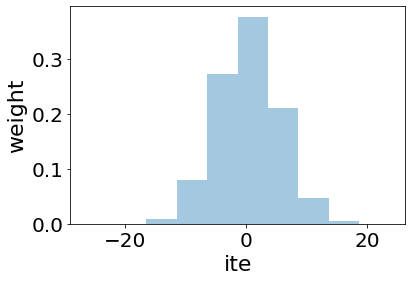

In [32]:
fig, ax = plt.subplots(1,1)
ax = sns.distplot(data['ITE-GDBR'],bins = bins, kde = kde, ax = ax, hist_kws={'weights': np.ones(len(data))/len(data)})

ax.set_xlabel('ite')
ax.set_ylabel('weight')
fig.savefig(path2+'ITE2hist.pdf', bbox_inches='tight',pad_inches = 0)

plt.show()

### Weighted Kmeans 2-Clustering

In [33]:
%%time
#all_data = [box, kmeans, agglo, box2, kmeans2, agglo2]
all_data = [box, kmeans, box2, kmeans2]

#names = ['Box-Cl2', 'Kmeans-Cl2', 'Agglo-Cl2', 'Box2-Cl2', 'Kmeans2-Cl2', 'Agglo2-Cl2']
#names2 = ['Box-ATT', 'Kmeans-ATT', 'Agglo-ATT', 'Box-ATT', 'Kmeans-ATT', 'Agglo-ATT']

names = ['Box-Cl2', 'Kmeans-Cl2',  'Box2-Cl2', 'Kmeans2-Cl2']
names2 = ['Box-ATT', 'Kmeans-ATT',  'Box-ATT', 'Kmeans-ATT']

weights = ['Box-Weights', 'Kmeans-Weights', 'Box-Weights', 'Kmeans-Weights']

for dd, name, name2,w in zip(all_data, names, names2,weights):
    kmeans_clustering(dd, clusters = 2, col_select = [name2], 
                      cluster_name = name, fit_kwargs={'sample_weight':dd[w].values} )

CPU times: user 861 ms, sys: 32.1 ms, total: 893 ms
Wall time: 160 ms


In [34]:
box

,Box-Cluster,Box-ATT,Box-points,Box-Hom,Box-Weights,Box-Cl2
0,0,-0.079133,1409.0,1.0,0.000705,0
1,1,-0.172258,1451.0,1.0,0.000726,0
2,2,-0.196278,1399.0,1.0,0.000700,0
3,3,0.328019,1390.0,1.0,0.000695,0
4,4,-0.194898,1489.0,1.0,0.000745,0
...,...,...,...,...,...,...
1364,1364,0.426797,1486.0,1.0,0.000743,0
1365,1365,0.241997,1409.0,1.0,0.000705,0
1366,1366,0.295582,1459.0,1.0,0.000730,0
1367,1367,-0.200389,1447.0,1.0,0.000723,0


In [35]:
data2 = data.copy()

In [36]:
data2.head(2)

,x0,x1,C,Treatment,Y,Ycf,ITE,IS_TEST,Ycf-GDBR,ITE-GDBR,Box-Cluster,Kmeans-Cluster
0,0.548814,0.715189,1,0,9.965060,1.816760,-8.148300,1,0.486333,-9.478727,982,1282
1,0.602763,0.544883,0,0,9.189899,0.518928,-8.670971,0,1.391655,-7.798244,762,970


### 2 Clustering in the ITEs

In [37]:
data2,_ = kmeans_clustering(data2,clusters = 2, cluster_name = 'ITE-CTrue',col_select = ['ITE'] )
data2,_ = kmeans_clustering(data2,clusters = 2, cluster_name = 'ITE-CGDBR',col_select = ['ITE-GDBR'] )

### Clustering for Drawing 
1. Apply Box clustering to separate the space in K clusters
2. Group by this clusters and get the Average C2-Avg from the 2 clustering
3. Color each box with the C2-Avg corresponding to each box

In [38]:
K = 10**4
data2,_ = box_clustering(data2, clusters = K, cluster_name = 'C2-Avg', col_select = col_select)

In [39]:
data2.head(2)

,x0,x1,C,Treatment,Y,Ycf,ITE,IS_TEST,Ycf-GDBR,ITE-GDBR,Box-Cluster,Kmeans-Cluster,ITE-CTrue,ITE-CGDBR,C2-Avg
0,0.548814,0.715189,1,0,9.965060,1.816760,-8.148300,1,0.486333,-9.478727,982,1282,0,0,7154
1,0.602763,0.544883,0,0,9.189899,0.518928,-8.670971,0,1.391655,-7.798244,762,970,0,0,5460


In [40]:
box.head(2)

,Box-Cluster,Box-ATT,Box-points,Box-Hom,Box-Weights,Box-Cl2
0,0,-0.079133,1409.0,1.0,0.000705,0
1,1,-0.172258,1451.0,1.0,0.000726,0


### Merge 2 Clustering with initial data

In [41]:
#merge_names = ['Box-Cluster', 'Kmeans-Cluster', 'Agglomerative-Cluster']*2
#class_names = ['Box-Cl2', 'Kmeans-Cl2', 'Agglo-Cl2', 'Box2-Cl2', 'Kmeans2-Cl2', 'Agglo2-Cl2']

merge_names = ['Box-Cluster', 'Kmeans-Cluster']*2
class_names = ['Box-Cl2', 'Kmeans-Cl2',  'Box2-Cl2', 'Kmeans2-Cl2']

for dd, merge_name, class_name in zip(all_data, merge_names, class_names):
    dd2 = dd[[merge_name, class_name]]


    data2 = data2.merge(dd2, on = merge_name, how = 'left' )

### Find Average 2 Clustering per draw cluster and merge them in the initial dataset

In [42]:
#merge_names = ['Box-Cluster', 'Kmeans-Cluster', 'Agglomerative-Cluster']*2
#class_names1 = ['Box-Cl2', 'Kmeans-Cl2', 'Agglo-Cl2', 'Box2-Cl2', 'Kmeans2-Cl2',
            #    'Agglo2-Cl2','ITE-CTrue', 'ITE-CGDBR']
class_names = ['Box-Cl2', 'Kmeans-Cl2',  'Box2-Cl2', 
               'Kmeans2-Cl2','ITE-CTrue', 'ITE-CGDBR']

avg_c = data2.groupby('C2-Avg', sort = True)[class_names].mean().reset_index()
data2 = data2.merge(avg_c, on = 'C2-Avg', how = 'left', suffixes=("","y"))

In [43]:
avg_c.head()

,C2-Avg,Box-Cl2,Kmeans-Cl2,Box2-Cl2,Kmeans2-Cl2,ITE-CTrue,ITE-CGDBR
0,0,0.0,0.0,0.0,0.0,0.429293,0.469697
1,1,0.0,0.0,0.0,0.0,0.458101,0.469274
2,2,0.0,0.0,0.0,0.0,0.447964,0.443439
3,3,0.0,0.0,0.0,0.0,0.481865,0.492228
4,4,0.0,0.0,0.0,0.0,0.488038,0.497608


In [44]:
data2.head(2)

,x0,x1,C,Treatment,Y,Ycf,ITE,IS_TEST,Ycf-GDBR,ITE-GDBR,Box-Cluster,Kmeans-Cluster,ITE-CTrue,ITE-CGDBR,C2-Avg,Box-Cl2,Kmeans-Cl2,Box2-Cl2,Kmeans2-Cl2,Box-Cl2y,Kmeans-Cl2y,Box2-Cl2y,Kmeans2-Cl2y,ITE-CTruey,ITE-CGDBRy
0,0.548814,0.715189,1,0,9.965060,1.816760,-8.148300,1,0.486333,-9.478727,982,1282,0,0,7154,1,1,1,1,1.0,1.0,1.0,1.0,0.516432,0.521127
1,0.602763,0.544883,0,0,9.189899,0.518928,-8.670971,0,1.391655,-7.798244,762,970,0,0,5460,0,0,0,0,0.0,0.0,0.0,0.0,0.473404,0.505319


### Plot reconstruction of data

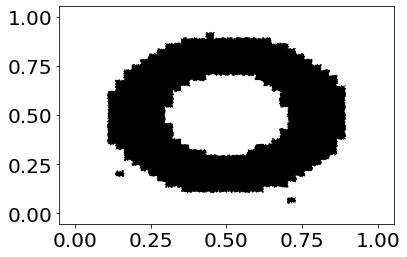

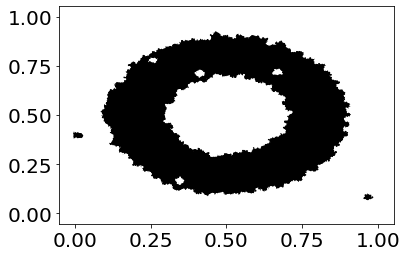

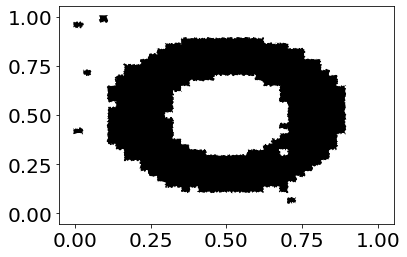

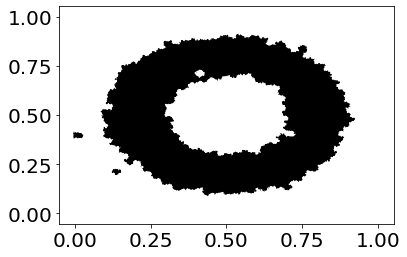

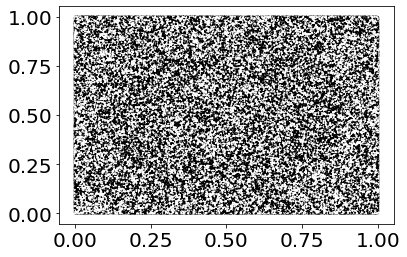

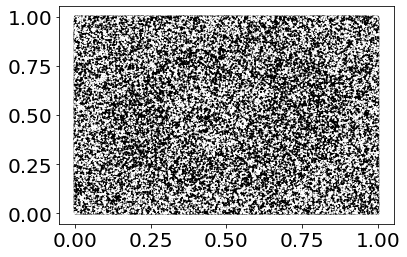

CPU times: user 9min 23s, sys: 13.6 s, total: 9min 36s
Wall time: 9min 22s


In [45]:
%%time
#class_names1 = ['Box-Cl2', 'Kmeans-Cl2', 'Agglo-Cl2', 'Box2-Cl2',
                #'Kmeans2-Cl2', 'Agglo2-Cl2', 'ITE-CTrue', 'ITE-CGDBR']


path3 = path_figs+'reconstruction/'
Path(path3).mkdir(exist_ok = True, parents = True)
class_names2 = [name+'y' for name in class_names]
use_poly = False
for name in class_names:
    #data2.plot.scatter(x='x0', y='x1', c=name, colormap='inferno')
    fig, ax = plt.subplots()
    if not use_poly:
        sc = ax.scatter(data2['x0'].values, data2['x1'].values, c=data2[name].values, cmap = 'Greys', s = 1)
    else:
        polygons, colors = generate_paths(K, Cdraw = avg_c, Cdraw_name=name)
        coll = mpl.collections.PolyCollection(polygons)
        coll.set(array = np.array(colors), cmap = 'Greys')
        ax.add_collection(coll)
        ax.figure.colorbar(coll)
    #ax.set_title(name)
    #fig.colorbar(sc)
    fig.savefig(path3+'{}.jpeg'.format(name), bbox_inches='tight',pad_inches = 0)

    plt.show()
    

### Plot same as above but with box averaging

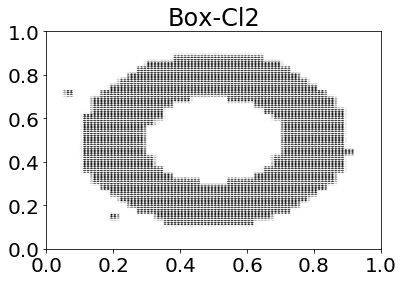

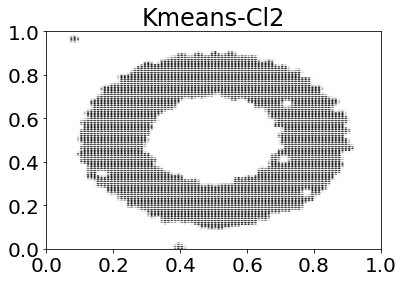

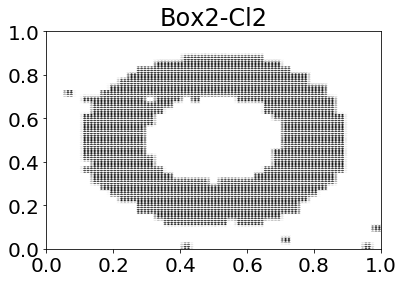

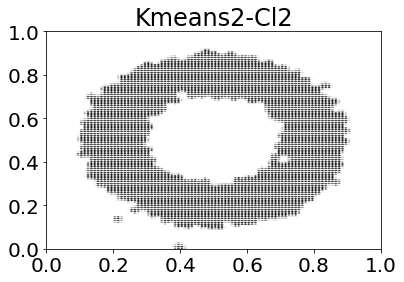

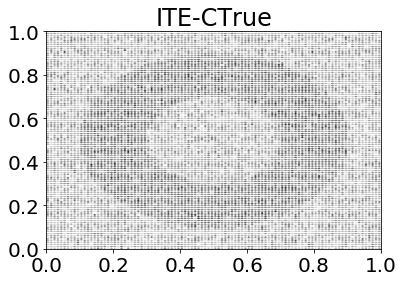

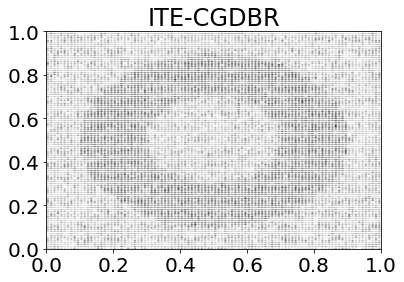

CPU times: user 3.53 s, sys: 136 ms, total: 3.66 s
Wall time: 3.76 s


In [46]:
%%time
#class_names1 = ['Box-Cl2', 'Kmeans-Cl2', 'Agglo-Cl2', 'Box2-Cl2',
                #'Kmeans2-Cl2', 'Agglo2-Cl2', 'ITE-CTrue', 'ITE-CGDBR']



class_names2 = [name+'y' for name in class_names]
use_poly = True
for name in class_names:
    #data2.plot.scatter(x='x0', y='x1', c=name, colormap='inferno')
    fig, ax = plt.subplots()
    if not use_poly:
        sc = ax.scatter(data2['x0'].values, data2['x1'].values, c=data2[name].values, cmap = 'Greys', s = 0.25)
    else:
        polygons, colors = generate_paths(K, Cdraw = avg_c, Cdraw_name=name)
        coll = mpl.collections.PolyCollection(polygons)
        coll.set(array = np.array(colors), cmap = 'Greys')
        ax.add_collection(coll)
       # ax.figure.colorbar(coll)
    ax.set_title(name)
    #fig.colorbar(sc)

    plt.show()
    

### homogeneity experiment

clusters = [4, 16, 25, 100]
clustering_algo = ['box_clustering', 'kmeans_clustering', 'agglomerative_clustering']

result = get_homogeneity(data.copy(),clusters = clusters, clustering_algo = clustering_algo, col_select = col_select)

pd.DataFrame(result)